## 10 Matplotlib Charts That Wow

#### 1) Annotated Line with Context Band
Great for time series where you need to highlight a trend plus a few “moments that matter.”

Why it impresses: Executives see the slope and the story — at once. Confidence bands reduce arguments about volatility.

Pro tip: Keep 2–3 annotations max; use short verbs (“launched,” “spiked,” “cut”).

Example

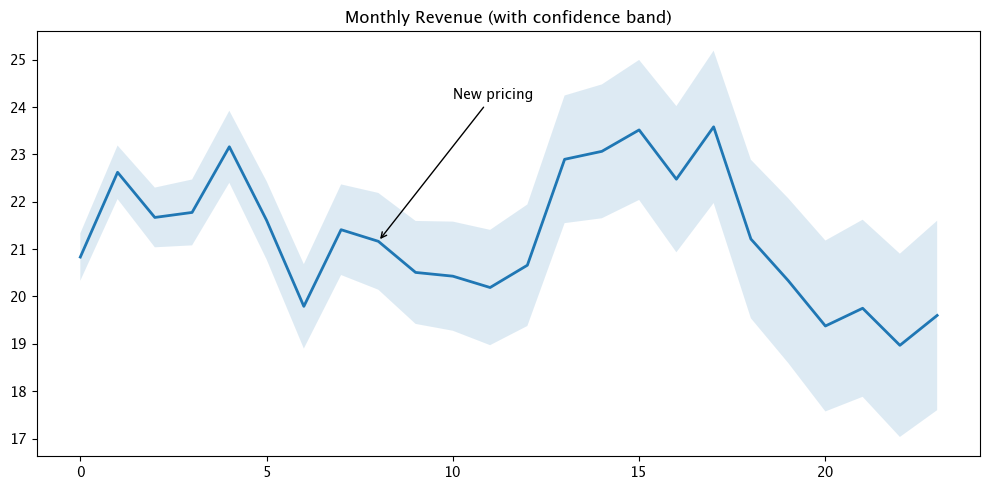

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(24)
y = np.cumsum(np.random.randn(24)) + 20
err = np.linspace(0.5, 2.0, 24)

plt.figure(figsize=(10,5))
plt.plot(x, y, linewidth=2)
plt.fill_between(x, y-err, y+err, alpha=0.15)
plt.annotate("New pricing", xy=(8, y[8]), xytext=(10, y[8]+3),
             arrowprops=dict(arrowstyle="->"))
plt.title("Monthly Revenue (with confidence band)")
plt.tight_layout(); plt.show()

#### 2) Slope Chart (Before/After)
Comparisons between two points in time — no clutter.

Why it impresses: It answers “who rose, who fell” in a single glance.

Pro tip: Label lines directly at both ends; skip the legend.

Example

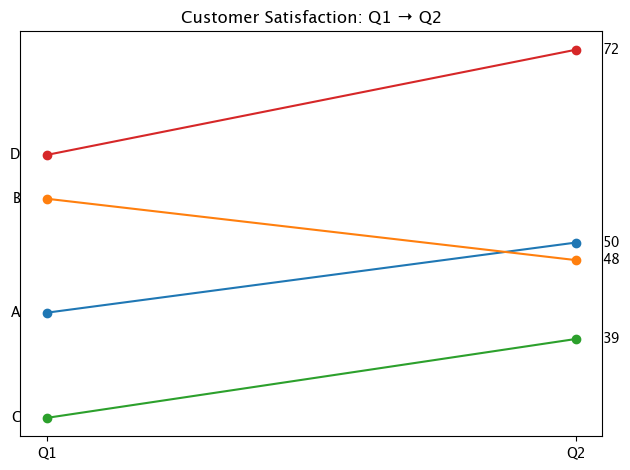

In [5]:
import matplotlib.pyplot as plt
cats = ["A","B","C","D"]
t0 = [42, 55, 30, 60]
t1 = [50, 48, 39, 72]

for i,c in enumerate(cats):
    plt.plot([0,1],[t0[i], t1[i]], marker="o")
    plt.text(-0.05, t0[i], c, ha="right", va="center")
    plt.text(1.05, t1[i], f"{t1[i]}", ha="left", va="center")

plt.xticks([0,1], ["Q1","Q2"]); plt.yticks([])
plt.title("Customer Satisfaction: Q1 → Q2")
plt.tight_layout(); plt.show()

#### 3) Lollipop Chart
Bars with circles at the end. Same information density as a bar chart, but cleaner.

Why it impresses: Minimal ink, high readability — looks sophisticated on slides.

Pro tip: Sort values. Use a single accent color for the top 1–2 items.

Example

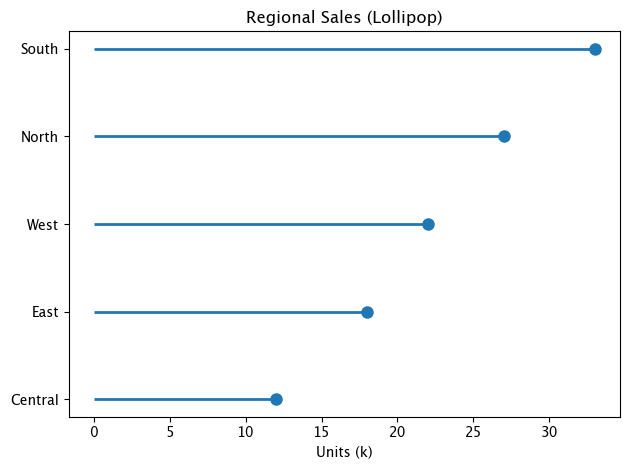

In [6]:
import matplotlib.pyplot as plt
vals = [18,22,27,33,12]
labs = ["East","West","North","South","Central"]
idx = sorted(range(len(vals)), key=lambda i: vals[i])
labs = [labs[i] for i in idx]; vals = [vals[i] for i in idx]

plt.hlines(range(len(vals)), 0, vals, linewidth=2)
plt.plot(vals, range(len(vals)), "o", markersize=8)
plt.yticks(range(len(vals)), labs); plt.xlabel("Units (k)")
plt.title("Regional Sales (Lollipop)")
plt.tight_layout(); plt.show()

#### 4) Dumbbell Plot (Two Values per Category)
Show “then vs now” or “target vs actual” with a connector.

Why it impresses: People instantly see gaps without reading a table.

Pro tip: Make the connector line thin and the endpoints bold.

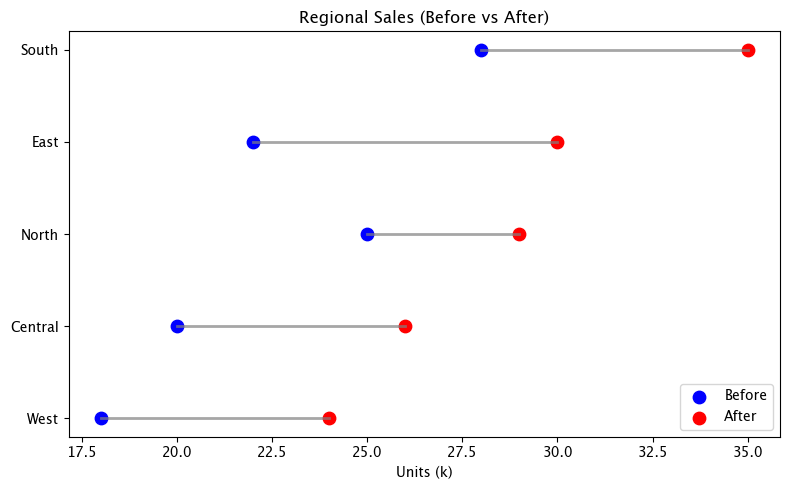

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: two values per category
categories = ["East", "West", "North", "South", "Central"]
before = [22, 18, 25, 28, 20]
after  = [30, 24, 29, 35, 26]

# Sorting categories for nicer display
idx = np.argsort(after)  
categories = [categories[i] for i in idx]
before = [before[i] for i in idx]
after = [after[i] for i in idx]

# Plot
plt.figure(figsize=(8,5))

# Horizontal lines between before & after
for i, (b, a) in enumerate(zip(before, after)):
    plt.plot([b, a], [i, i], color="gray", linewidth=2, alpha=0.7)

# Points
plt.scatter(before, range(len(categories)), color="blue", s=80, label="Before")
plt.scatter(after, range(len(categories)), color="red", s=80, label="After")

# Styling
plt.yticks(range(len(categories)), categories)
plt.xlabel("Units (k)")
plt.title("Regional Sales (Before vs After)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


#### 5) Waterfall Chart
Explains how you got from A to B: starting value, ups/downs, ending value.

Why it impresses: Perfect for budget or revenue bridges; it narrates cause and effect.

Pro tip: Use consistent colors for positive vs negative; end bar should stand out.

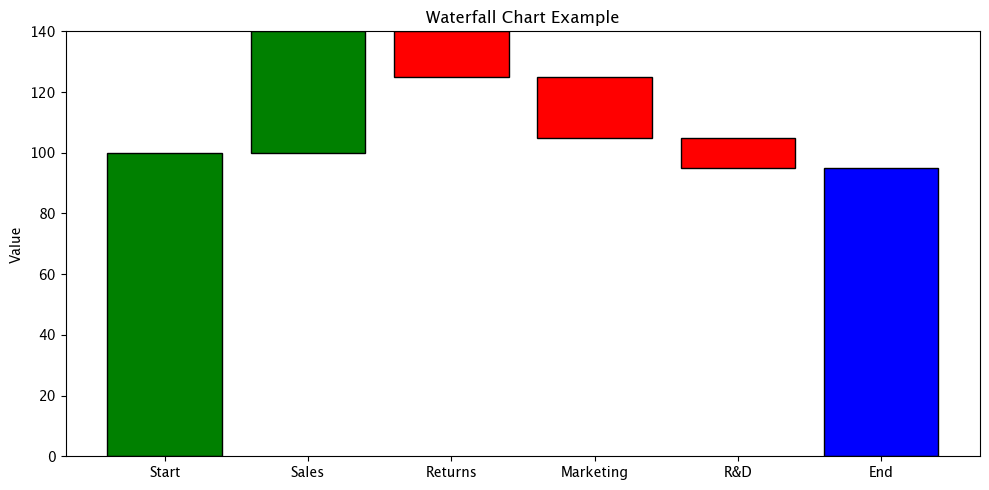

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ["Start", "Sales", "Returns", "Marketing", "R&D", "End"]
values = [100, 40, -15, -20, -10, 0]  # last one is placeholder for total

# Compute cumulative values
cum_values = [values[0]]
for v in values[1:-1]:
    cum_values.append(cum_values[-1] + v)
cum_values.append(cum_values[-1])  # final total

# Bar positions
indexes = np.arange(len(categories))

# Colors
colors = []
for v in values:
    if v > 0:
        colors.append("green")
    elif v < 0:
        colors.append("red")
    else:
        colors.append("gray")

# Plot
plt.figure(figsize=(10,5))

for i in range(len(values)-1):  # skip last, handle separately
    y0 = cum_values[i] - values[i] if i > 0 else 0
    plt.bar(indexes[i], values[i], bottom=y0, color=colors[i], edgecolor="black")

# Final bar for "End"
plt.bar(indexes[-1], cum_values[-1], color="blue", edgecolor="black")

# Labels
plt.xticks(indexes, categories)
plt.ylabel("Value")
plt.title("Waterfall Chart Example")
plt.tight_layout()
plt.show()


#### 6) 100% Stacked Bar (Share of the Whole)
When the question is “what’s our mix?”, not raw volume.

Why it impresses: Non-technical folks love clean composition pictures (market share, device mix, channel split).

Pro tip: Display percentages directly on segments for 3–5 categories; more than that gets noisy.

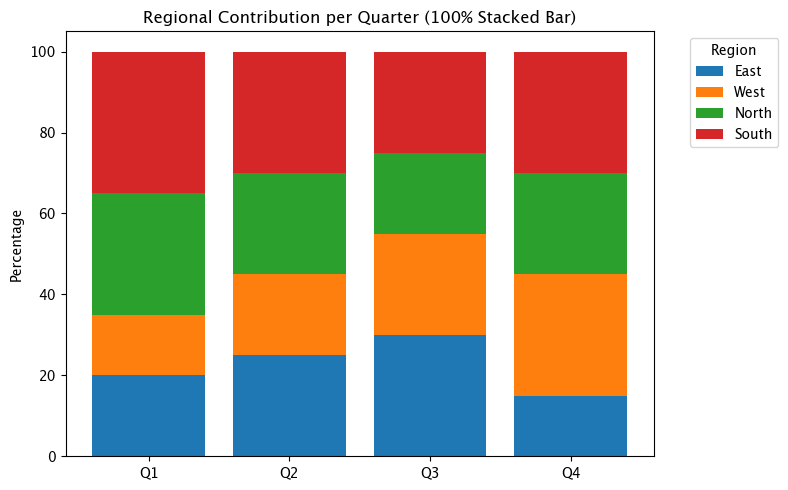

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: groups and categories
groups = ["Q1", "Q2", "Q3", "Q4"]
segments = ["East", "West", "North", "South"]
data = np.array([
    [20, 15, 30, 35],
    [25, 20, 25, 30],
    [30, 25, 20, 25],
    [15, 30, 25, 30]
])

# Convert to percentages (row-wise normalization)
data_pct = data / data.sum(axis=1)[:, None] * 100

# Plot
fig, ax = plt.subplots(figsize=(8,5))

bottom = np.zeros(len(groups))  # start from 0 for stacking
colors = plt.cm.tab10.colors     # nice color palette

for i, seg in enumerate(segments):
    ax.bar(groups, data_pct[:, i], bottom=bottom, 
           label=seg, color=colors[i])
    bottom += data_pct[:, i]

# Styling
ax.set_ylabel("Percentage")
ax.set_title("Regional Contribution per Quarter (100% Stacked Bar)")
ax.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


#### 7) Bullet Chart (KPI on a Single Line)
A compact bar that shows actual vs target, with qualitative ranges.

Why it impresses: Executives get “Are we on track?” without squinting.

Pro tip: Place actual as a thick bar, target as a thin marker; keep ranges light.

Example

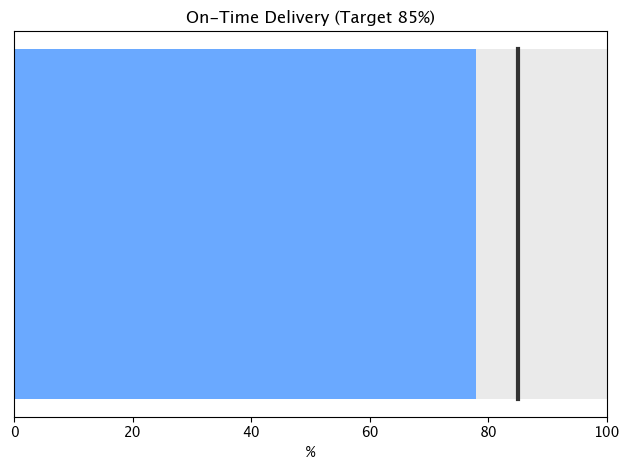

In [7]:
import matplotlib.pyplot as plt
actual, target = 78, 85
plt.barh([0], [100], color="#eaeaea", height=0.4)
plt.barh([0], [actual], color="#6aa9ff", height=0.4)
plt.plot([target, target], [-0.2, 0.2], linewidth=3, color="#333")
plt.yticks([]); plt.xlabel("%"); plt.title("On-Time Delivery (Target 85%)")
plt.xlim(0,100); plt.tight_layout(); plt.show()

#### 8) Funnel (Process Drop-Off)
From visits → signups → activations → paid. The shape tells the story.

Why it impresses: Everyone understands narrowing stages; it’s immediately memorable.

Pro tip: Left-align bars with decreasing width; label absolute numbers and rates.

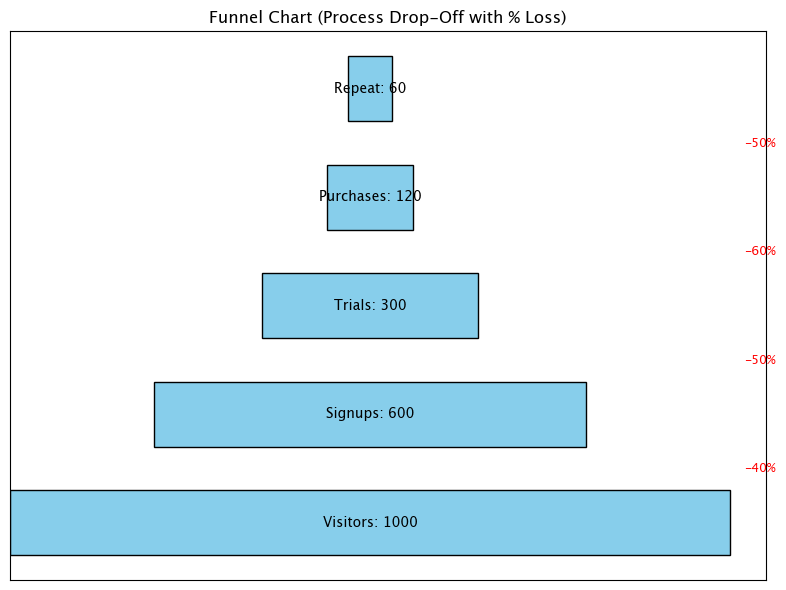

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: process stages
stages = ["Visitors", "Signups", "Trials", "Purchases", "Repeat"]
values = [1000, 600, 300, 120, 60]

# Normalize widths for plotting
max_val = max(values)
widths = [v / max_val for v in values]

# Vertical positions (top to bottom)
y_pos = np.arange(len(stages))[::-1]

plt.figure(figsize=(8,6))

for i, (stage, value, width) in enumerate(zip(stages, values, widths)):
    # Draw centered rectangle (funnel effect)
    plt.barh(y_pos[i], width, height=0.6,
             left=(1-width)/2, color="skyblue", edgecolor="black")
    # Add stage + value text
    plt.text(0.5, y_pos[i], f"{stage}: {value}", 
             ha="center", va="center", fontsize=10, weight="bold")

    # Add percentage drop-off (except for first stage)
    if i > 0:
        prev_val = values[i-1]
        drop_pct = (prev_val - value) / prev_val * 100
        plt.text(1.02, (y_pos[i] + y_pos[i-1]) / 2,
                 f"-{drop_pct:.0f}%", ha="left", va="center",
                 fontsize=9, color="red")

# Formatting
plt.gca().invert_yaxis()  # funnel goes top → bottom
plt.xticks([]); plt.yticks([])
plt.title("Funnel Chart (Process Drop-Off with % Loss)")
plt.tight_layout()
plt.show()


#### 9) Calendar Heatmap (Activity Over Time)
A month-grid heatmap for daily counts (tickets, pushes, logins).

Why it impresses: Reveals weekly rhythms and seasonality without a single sentence.

Pro tip: Keep the palette soft; annotate only the outliers.

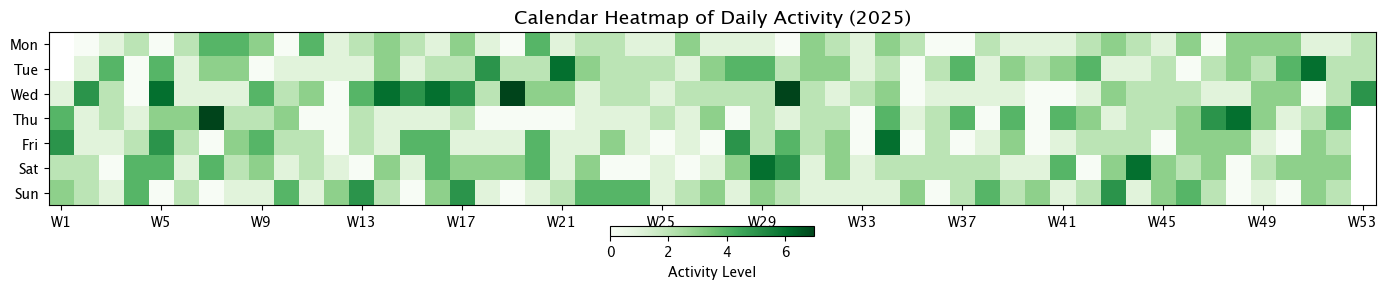

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate example daily activity for one year
rng = pd.date_range("2025-01-01", "2025-12-31", freq="D")
activity = np.random.poisson(2, len(rng))  # random activity
data = pd.DataFrame({"date": rng, "activity": activity})

# Add weekday and week number
data["dow"] = data["date"].dt.weekday  # Monday=0
data["week"] = data["date"].dt.isocalendar().week

# Handle last few days of December that spill into week 1 of next year
data.loc[(data["date"].dt.month == 12) & (data["week"] == 1), "week"] = 53

# Pivot into calendar grid
heatmap = data.pivot(index="dow", columns="week", values="activity")

# Plot
fig, ax = plt.subplots(figsize=(14, 3))
cmap = plt.cm.Greens

im = ax.imshow(heatmap, aspect="auto", cmap=cmap)

# Formatting
ax.set_yticks(range(7))
ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_xticks(range(0, 54, 4))
ax.set_xticklabels([f"W{k}" for k in range(1, 54, 4)])
ax.set_title("Calendar Heatmap of Daily Activity (2025)", fontsize=14)

# Colorbar
cbar = plt.colorbar(im, ax=ax, orientation="horizontal", fraction=0.05, pad=0.1)
cbar.set_label("Activity Level")

plt.tight_layout()
plt.show()


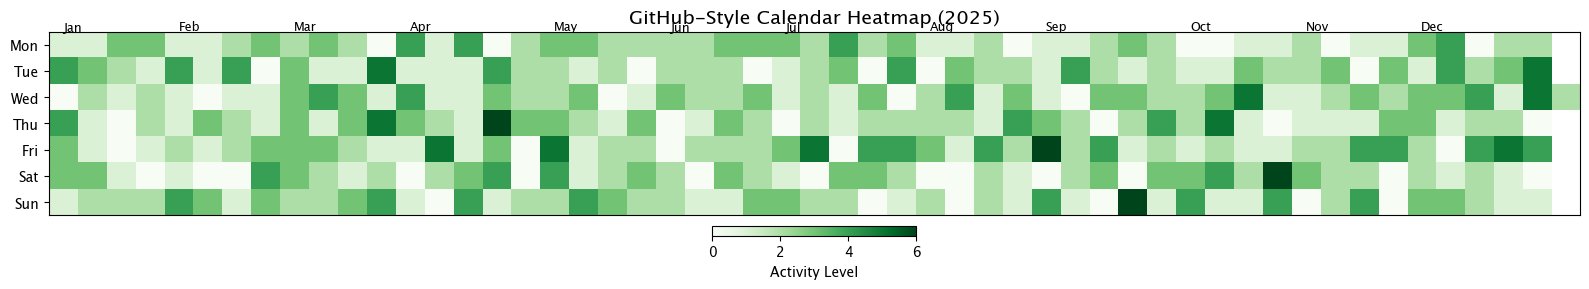

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar

# Example data: one year of daily activity
rng = pd.date_range("2025-01-01", "2025-12-31", freq="D")
activity = np.random.poisson(2, len(rng))  # random activity
data = pd.DataFrame({"date": rng, "activity": activity})

# Add week number (relative from year start) and day of week
data["dow"] = data["date"].dt.weekday  # Monday=0
data["week"] = (data["date"] - pd.Timestamp("2025-01-01")).dt.days // 7

# Create pivot table for plotting
heatmap = data.pivot(index="dow", columns="week", values="activity")

# Plot
fig, ax = plt.subplots(figsize=(16, 3))
cmap = plt.cm.Greens

im = ax.imshow(heatmap, aspect="auto", cmap=cmap)

# Weekday labels
ax.set_yticks(range(7))
ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

# Remove default x ticks
ax.set_xticks([])

# Add month labels
first_days = pd.date_range("2025-01-01", "2025-12-01", freq="MS")
for d in first_days:
    week_idx = (d - pd.Timestamp("2025-01-01")).days // 7
    ax.text(week_idx, -0.7, calendar.month_abbr[d.month],
            ha="left", va="center", fontsize=9, weight="bold")

# Title + colorbar
ax.set_title("GitHub-Style Calendar Heatmap (2025)", fontsize=14)
cbar = plt.colorbar(im, ax=ax, orientation="horizontal", fraction=0.05, pad=0.05)
cbar.set_label("Activity Level")

plt.tight_layout()
plt.show()


#### 10) Small Multiples (Sparklines Grid)
Tiny, consistent charts in a grid — one per product, region, or metric.

Why it impresses: Pattern comparison at scale. It looks editorial-grade when spaced well.

Pro tip: Remove chart junk. Keep only the baseline and the line.

Example



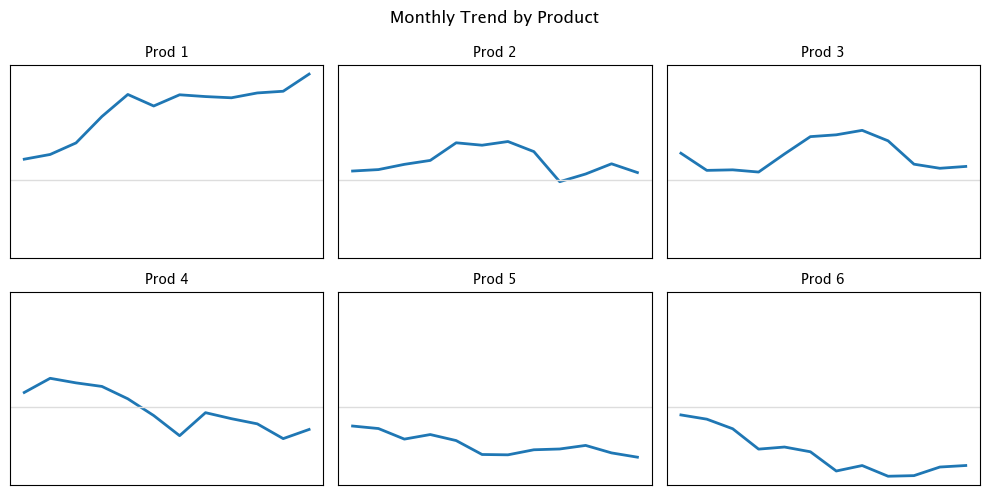

In [8]:
import matplotlib.pyplot as plt, numpy as np
np.random.seed(0)
series = {f"Prod {i+1}": np.cumsum(np.random.randn(12)) for i in range(6)}

fig, axes = plt.subplots(2,3, figsize=(10,5), sharex=True, sharey=True)
for ax,(name, y) in zip(axes.flat, series.items()):
    ax.plot(y, linewidth=2)
    ax.axhline(0, color="#ddd", linewidth=1)
    ax.set_title(name, fontsize=10)
    ax.set_xticks([]); ax.set_yticks([])
fig.suptitle("Monthly Trend by Product"); plt.tight_layout(); plt.show()